In [1]:
import torch
import numpy as np
from encoder import *
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
rest = encode('dataset1/track1.csv', int(50000), 400, save=True)

100%|██████████| 210/210 [01:55<00:00,  1.81it/s]


In [7]:
torch.save(rest, 'rtest.pt')

In [8]:
def count(t):
    t = sum(t)
    c = 0
    for i in t:
        if i != 0:
            c += 1
    return c

In [9]:
for i in range(len(rest)):
    if count(rest[i]) != 5:
        print(i, count(rest[i]))
    # plt.figure()
    # plt.imshow(rest[i], cmap='binary')
    # plt.show()
    # clear_output(wait=True)

70 4
71 3
72 2
73 2
74 2
75 2
76 2
77 2
78 2
79 2
80 2
81 2
82 2
83 2
84 2
85 2
86 2
87 3
88 3
89 3
90 3
91 2
92 2
93 2
94 2
95 3
96 3
97 3
98 3
99 3
100 2
101 2
102 2
103 3
104 3
105 3
106 3
107 3
108 3
109 3
110 3
111 3
112 3
113 3
114 3
115 3
116 3
117 3
118 3
119 3
120 3
121 3
122 3
123 3
124 2
125 3
126 3
127 3
128 3
129 2
130 2
131 2
132 2
133 3
134 3
135 3
136 3
137 3
138 3
139 3
140 2
141 2
142 2
143 2
144 2
145 2
146 3
147 3
148 3
149 3
150 2
151 3
152 3
153 3
154 2
155 2
156 2
157 2
158 2
159 2
160 2
161 2
162 2
163 3
164 3
165 2
166 2
167 2
168 2
169 2
170 3
171 4
206 4
207 4
208 4
209 4


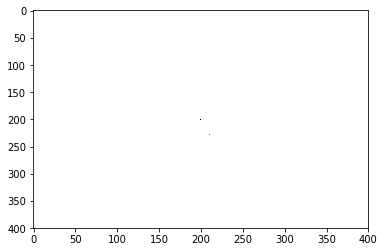

In [6]:
plt.imshow(rest[13], cmap='binary', interpolation='nearest', aspect='auto')